In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 
from matplotlib.ticker import ScalarFormatter

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# diff = "nodiff"
diff="5percent"


nubb_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_1bar_{diff}_reco.h5",  "meta")
nubb_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_5bar_{diff}_reco.h5",  "meta")
nubb_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_10bar_{diff}_reco.h5", "meta")
nubb_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_15bar_{diff}_reco.h5", "meta")
nubb_meta_25bar = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_25bar_{diff}_reco.h5", "meta")
# display(nubb_meta_1bar)
# display(nubb_meta_5bar)

Tl_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_1bar_{diff}_reco.h5",  "meta")
Tl_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_5bar_{diff}_reco.h5",  "meta")
Tl_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_10bar_{diff}_reco.h5", "meta")
Tl_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_15bar_{diff}_reco.h5", "meta")
Tl_meta_25bar = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_25bar_{diff}_reco.h5", "meta")
# display(Tl_meta_1bar)
# display(Tl_meta_15bar)

Bi_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_1bar_{diff}_reco.h5",  "meta")
Bi_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_5bar_{diff}_reco.h5",  "meta")
Bi_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_10bar_{diff}_reco.h5", "meta")
Bi_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_15bar_{diff}_reco.h5", "meta")
Bi_meta_25bar = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_25bar_{diff}_reco.h5", "meta")
# display(Bi_meta_1bar)
# display(Bi_meta_15bar)

single_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_single_1bar_{diff}_reco.h5",  "meta")
single_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_single_5bar_{diff}_reco.h5",  "meta")
single_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_single_10bar_{diff}_reco.h5", "meta")
single_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_single_15bar_{diff}_reco.h5", "meta")
single_meta_25bar = pd.read_hdf(f"../data/Trackreco/ATPC_single_25bar_{diff}_reco.h5", "meta")


Bkg_meta_1bar  = pd.concat([Tl_meta_1bar,  Bi_meta_1bar,  single_meta_1bar])
Bkg_meta_5bar  = pd.concat([Tl_meta_5bar,  Bi_meta_5bar,  single_meta_5bar])
Bkg_meta_10bar = pd.concat([Tl_meta_10bar, Bi_meta_10bar, single_meta_10bar])
Bkg_meta_15bar = pd.concat([Tl_meta_15bar, Bi_meta_15bar, single_meta_15bar])
Bkg_meta_25bar = pd.concat([Tl_meta_25bar, Bi_meta_25bar, single_meta_25bar])


# Bkg_meta_1bar  = pd.concat([Bi_meta_1bar])
# Bkg_meta_5bar  = pd.concat([Bi_meta_5bar])
# Bkg_meta_10bar = pd.concat([Bi_meta_10bar])
# Bkg_meta_15bar = pd.concat([Bi_meta_15bar])
# Bkg_meta_25bar = pd.concat([Bi_meta_25bar])



In [3]:
num_nubb_1bar  = len(nubb_meta_1bar.event_id.unique())
num_nubb_5bar  = len(nubb_meta_5bar.event_id.unique())
num_nubb_10bar = len(nubb_meta_10bar.event_id.unique())
num_nubb_15bar = len(nubb_meta_15bar.event_id.unique())
num_nubb_25bar = len(nubb_meta_25bar.event_id.unique())

num_Bkg_1bar  = len(Bkg_meta_1bar.event_id.unique())
num_Bkg_5bar  = len(Bkg_meta_5bar.event_id.unique())
num_Bkg_10bar = len(Bkg_meta_10bar.event_id.unique())
num_Bkg_15bar = len(Bkg_meta_15bar.event_id.unique())
num_Bkg_25bar = len(Bkg_meta_25bar.event_id.unique())

num_Bi_1bar  = len(Bi_meta_1bar.event_id.unique())
num_Bi_5bar  = len(Bi_meta_5bar.event_id.unique())
num_Bi_10bar = len(Bi_meta_10bar.event_id.unique())
num_Bi_15bar = len(Bi_meta_15bar.event_id.unique())
num_Bi_25bar = len(Bi_meta_25bar.event_id.unique())

num_Tl_1bar  = len(Tl_meta_1bar.event_id.unique())
num_Tl_5bar  = len(Tl_meta_5bar.event_id.unique())
num_Tl_10bar = len(Tl_meta_10bar.event_id.unique())
num_Tl_15bar = len(Tl_meta_15bar.event_id.unique())
num_Tl_25bar = len(Tl_meta_25bar.event_id.unique())

num_single_1bar  = len(single_meta_1bar.event_id.unique())
num_single_5bar  = len(single_meta_5bar.event_id.unique())
num_single_10bar = len(single_meta_10bar.event_id.unique())
num_single_15bar = len(single_meta_15bar.event_id.unique())
num_single_25bar = len(single_meta_25bar.event_id.unique())


sf_nubb_1bar  = 1
sf_nubb_5bar  = num_nubb_1bar/num_nubb_5bar
sf_nubb_10bar = num_nubb_1bar/num_nubb_10bar
sf_nubb_15bar = num_nubb_1bar/num_nubb_15bar
sf_nubb_25bar = num_nubb_1bar/num_nubb_25bar
sf_Bkg_1bar   = num_nubb_1bar/num_Bkg_1bar
sf_Bkg_5bar   = num_nubb_1bar/num_Bkg_5bar
sf_Bkg_10bar  = num_nubb_1bar/num_Bkg_10bar
sf_Bkg_15bar  = num_nubb_1bar/num_Bkg_15bar
sf_Bkg_25bar  = num_nubb_1bar/num_Bkg_25bar

print("tot, scale fact nubb 1bar:",  num_nubb_1bar,  sf_nubb_1bar)
print("tot, scale fact nubb 5bar:",  num_nubb_5bar,  sf_nubb_5bar)
print("tot, scale fact nubb 10bar:", num_nubb_10bar, sf_nubb_10bar)
print("tot, scale fact nubb 15bar:", num_nubb_15bar, sf_nubb_15bar)
print("tot, scale fact nubb 25bar:", num_nubb_25bar, sf_nubb_25bar)

print("\n")
print("tot events Bi 1bar:",  num_Bi_1bar)
print("tot events Bi 5bar:",  num_Bi_5bar)
print("tot events Bi 10bar:", num_Bi_10bar)
print("tot events Bi 15bar:", num_Bi_15bar)
print("tot events Bi 25bar:", num_Bi_25bar)


print("\n")
print("tot events Tl 1bar:",  num_Tl_1bar)
print("tot events Tl 5bar:",  num_Tl_5bar)
print("tot events Tl 10bar:", num_Tl_10bar)
print("tot events Tl 15bar:", num_Tl_15bar)
print("tot events Tl 25bar:", num_Tl_25bar)

print("\n")
print("tot, scale fact Bkg 1bar:",  num_Bkg_1bar,  sf_Bkg_1bar)
print("tot, scale fact Bkg 5bar:",  num_Bkg_5bar,  sf_Bkg_5bar)
print("tot, scale fact Bkg 10bar:", num_Bkg_10bar, sf_Bkg_10bar)
print("tot, scale fact Bkg 15bar:", num_Bkg_15bar, sf_Bkg_15bar)
print("tot, scale fact Bkg 25bar:", num_Bkg_25bar, sf_Bkg_25bar)

tot, scale fact nubb 1bar: 192957 1
tot, scale fact nubb 5bar: 194964 0.9897057918384933
tot, scale fact nubb 10bar: 194735 0.9908696433614913
tot, scale fact nubb 15bar: 195239 0.9883117614820809
tot, scale fact nubb 25bar: 191127 1.009574785352148


tot events Bi 1bar: 190431
tot events Bi 5bar: 276767
tot events Bi 10bar: 325363
tot events Bi 15bar: 177044
tot events Bi 25bar: 37803


tot events Tl 1bar: 195314
tot events Tl 5bar: 237794
tot events Tl 10bar: 207767
tot events Tl 15bar: 201837
tot events Tl 25bar: 60113


tot, scale fact Bkg 1bar: 570694 0.33810938962035697
tot, scale fact Bkg 5bar: 710260 0.27167093740320447
tot, scale fact Bkg 10bar: 726145 0.26572791935494977
tot, scale fact Bkg 15bar: 572098 0.33727962691706664
tot, scale fact Bkg 25bar: 280927 0.6868581517618456


In [4]:
# Plot some variables like number of tracks
%matplotlib widget


# Function to compute count-based ratio per event_id
def compute_ratio(group):
    # Group 1: Count of Primary + Delta*
    count_group1 = group[group["label"].str.startswith(("Primary", "Delta"))].shape[0]

    # Group 2: Count of Brem* where 0.025 < energy < 0.035 (X-rays)
    count_xrays = group[(group["label"].str.startswith("Brem")) & (group["energy"].between(0.025, 0.035))].shape[0]

    # Group 3: Count of Brem* where energy ≤ 0.025 or ≥ 0.035
    count_group3 = group[(group["label"].str.startswith("Brem")) & (~group["energy"].between(0.025, 0.035))].shape[0]

    # Compute ratio
    ratio = count_xrays / (count_group1 + count_group3)
    
    return ratio

# applies cuts to the delta, brem and primary+delta energies
def ApplyGeneralCuts(df_meta, df_primary, cut_brem, cut_delta, cut_trk_e):

    brems  = GetBrems(df_meta)

    brems = brems[brems.energy > cut_brem] # these are events to cut

    df_meta = df_meta[~df_meta.event_id.isin(brems.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(brems.event_id.unique())]

    deltas  = GetDeltas(df_meta)

    deltas = deltas[deltas.energy > cut_delta] # these are events to cut

    df_meta = df_meta[~df_meta.event_id.isin(deltas.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(deltas.event_id.unique())]


    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    trk_energies = trk_energies[trk_energies > cut_trk_e]
    unique_events_list = trk_energies.index.unique().tolist()

    df_meta = df_meta[~df_meta.event_id.isin(unique_events_list)]
    df_primary = df_primary[~df_primary.event_id.isin(unique_events_list)]

    return df_meta, df_primary

def ApplyDeltaLenCut(df_meta, df_primary, cut_delta):

    deltas  = GetDeltas(df_meta)

    deltas = deltas[deltas.length > cut_delta] # these are events to cut

    df_meta    = df_meta[~df_meta.event_id.isin(deltas.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(deltas.event_id.unique())]

    return df_meta, df_primary

def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["length"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts


def GetNParticles(df_meta, label):
    # Set threshold for cumulative_distance
    threshold = 0

    # Filter events with brem in the name
    filtered_df = df_meta[df_meta["label"].str.contains(label, na=False)]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": f"N_{label}"}, inplace=True)

    return trk_counts


def GetDeltas(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Delta", na=False)]

    return filtered_df

def GetBrems(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Brem", na=False)]

    return filtered_df

# Gets the sum of the primary track and the delta energies
def GetTrackDeltaEnergy(df_meta):
    # Filter events with brem in the name
    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    return trk_energies.values

# Cut out events with Brem in the name
def ApplyNTracksLenCut(df_meta, df_primary, keep_xrays):

    brems  = GetBrems(df_meta)

    if (keep_xrays):
        brems = brems[ (brems.energy < 28e-3) & (brems.energy > 30e-3) ] # these are events to cut

    df_meta    = df_meta[~df_meta.event_id.isin(brems.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(brems.event_id.unique())]

    return df_meta, df_primary


# Cut out events with Brem in the name
def ApplyEventEnergyCut(df_meta, df_primary, E_res):

    event_energy = df_meta.groupby("event_id").energy.sum()

    if (E_res == 0.5):
        good_events = event_energy[(event_energy >= 2.454) & (event_energy <= 2.471)].index # 0.5%
    else:
        good_events = event_energy[(event_energy >= 2.433) & (event_energy <= 2.48)].index # 1.0%
    df_meta = df_meta[df_meta["event_id"].isin(good_events)]
    df_primary = df_primary[df_primary["event_id"].isin(good_events)]

    return df_meta, df_primary

def ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, Eres):

    cuts = []

    # Apply containment
    df_meta = df_meta[df_meta.contained == True]
    df_primary = df_primary[df_primary.contained == True]
    df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)

    # 1 bar
    if (pressure == 1):
       
        # 1bar no diff
        if (diffusion == "nodiff"):
            
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob1R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.Tortuosity2 > 1.7) & (df_primary.energy > 1.95) & (df_primary.Squiglicity2 > 2)
            
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob1R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.Tortuosity2 > 1.7) & (df_primary.energy > 2.18) & (df_primary.Squiglicity2 > 2)

            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 5%
        elif (diffusion == "5percent"):
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.37) & (df_primary.blob1R > 0.34) &  (df_primary.energy > 2.35) & (df_primary.Tortuosity2 >1.3)

            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=True)
                cuts = (df_primary.blob2R > 0.3) 

            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.blob2 > 0.45) & (df_primary.blob1R > 0.34) &  (df_primary.energy > 2.35) & (df_primary.Tortuosity2 >1.3)

            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.25%
        elif (diffusion == "0.25percent"):
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.38) & (df_primary.blob2 > 0.35) & (df_primary.blob1R > 0.3)  & (df_primary.energy > 2.39)

            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.45) & (df_primary.blob1R > 0.3)  & (df_primary.energy > 2.38)

            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.1%
        elif (diffusion == "0.1percent"):
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.385) & (df_primary.blob2 > 0.3)     & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & (df_primary.length > 1000)

            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.blob2 > 0.45)     & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & (df_primary.length > 1000)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 10 He%
        elif (diffusion == "0.05percent"):
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.33) & (df_primary.blob2 > 0.3)     & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & (df_primary.length > 600)

            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.43) & (df_primary.blob2 > 0.43)     & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & (df_primary.length > 600)

            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.0%
        elif (diffusion == "0.0percent"):
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2 > 0.18) & (df_primary.blob2R > 0.18) &  (df_primary.energy > 2.33) & (df_primary.length > 600)

            elif (mode == "nat"):
                cuts = (df_primary.blob2 > 0.25) & (df_primary.blob2R > 0.25) &  (df_primary.blob1 > 0.18) &  (df_primary.energy > 2.4) & (df_primary.length > 600)

            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")
    # -------------------------------------------------------------------------------------------------------------------------------------
    # 5bar
    elif (pressure == 5):
    
        # 5 bar no diff
        if (diffusion == "nodiff"):
            
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.42) & (df_primary.blob2 > 0.42) & (df_primary.blob1 > 0.42) & (df_primary.blob1R > 0.42) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.36)

            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.45) & (df_primary.blob1 > 0.42) & (df_primary.blob1R > 0.42) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.36)
                
            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 5bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.35) & (df_primary.blob1R > 0.35) & (df_primary.energy > 2.4) & (df_primary.Tortuosity2 > 1.3)
            
            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=False)
                cuts = (df_primary.blob2R > 0.3) & (df_primary.blob2 > 0.4) 

            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.4) &  (df_primary.blob2 > 0.39) & (df_primary.blob1R > 0.35) & (df_primary.energy > 2.4) & (df_primary.Tortuosity2 > 1.3)

            else:
                print("Unknown cut mode specified")

        # 5bar 10% He
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2 > 0.65) & (df_primary.energy > 2.35)
            elif (mode == "nat"):
                cuts = (df_primary.blob2 > 0.67) & (df_primary.blob1 > 0.67) & (df_primary.energy > 2.36)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 10bar
    elif (pressure == 10):

        # 10bar no diff
        if (diffusion == "nodiff"):
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.59) & (df_primary.blob1 > 0.4) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5) 
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.59) & (df_primary.blob1 > 0.5) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5) 
            else:
                print("Unknown cut mode specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 10bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.42) & (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.42) & (df_primary.energy > 2.4) 

            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=False)
                cuts = (df_primary.blob2R > 0.3) & (df_primary.blob2 > 0.4) 

            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.45) & (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.42) & (df_primary.energy > 2.4) 

            else:
                print("Unknown cut mode specified")

        # 10bar 10% He
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.27) & (df_primary.blob2 > 0.27) & (df_primary.energy > 2.2) 

            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.3) & (df_primary.blob2 > 0.3) & (df_primary.energy > 2.2) 

            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 15bar
    elif (pressure == 15):
        
        # 15bar no diff
        if (diffusion == "nodiff"):
        
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.52) & (df_primary.blob2 > 0.52) & (df_primary.blob1 > 0.39) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5)
            
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.53) & (df_primary.blob2 > 0.58) & (df_primary.blob1 > 0.39) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5)

            else:
                print("Unknown cut mode specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 15bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.53) & (df_primary.blob2 > 0.6) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35)


            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=False)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) 

            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.53) & (df_primary.blob2 > 0.7) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35)

            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 15bar 10% he
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "all"):
                cuts =  (df_primary.blob2 > 0.64) & (df_primary.energy > 2.35)
            elif (mode == "nat"):
                cuts =  (df_primary.blob2 > 0.67) & (df_primary.energy > 2.35)

            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 25bar
    elif (pressure == 25):

        # 25bar no diff
        if (diffusion == "nodiff"):
        
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.56) & (df_primary.blob2 > 0.56) & (df_primary.blob1 > 0.39) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5)

            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.57) & (df_primary.blob2 > 0.57) & (df_primary.blob1 > 0.39) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5)

            else:
                print("Unknown cut mode specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 25bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.43) & (df_primary.blob2 > 0.43) & (df_primary.blob1 > 0.3) & (df_primary.energy > 2.4) 
        
            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=False)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) 

            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.45) & (df_primary.blob1 > 0.3) & (df_primary.energy > 2.4) 

            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 25bar 10% He
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "all"):
                cuts = (df_primary.blob2R > 0.43) & (df_primary.blob2 > 0.43) & (df_primary.blob1 > 0.3) & (df_primary.energy > 2.4) 

        else:
            print("Unknown diffusion specified")

    else:
        print("Unknown pressure specified")

    return df_meta, df_primary, cuts


def PlotDistributionswithCuts(df_meta, col, label, pressure, diffusion, mode, scale_factor):

    print("Running cuts with")
    print("Pressure:",  pressure,"bar")
    print("Diffusion:", diffusion )
    print("Cut mode is :", mode)

    uselog=True

    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, 1.0)
    

    df_primary = df_primary[ cuts ]

    df_meta = df_meta[(df_meta.event_id.isin(df_primary.event_id.unique()))]

    df_counts      = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem  = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    # Calculate the ratio of x-rays to tracks
    # x_ray_ratio = df_meta.groupby("event_id").apply(compute_ratio).reset_index(name="ratio")


    weights        = np.ones_like(df_primary.energy)  * scale_factor
    weights_counts = np.ones_like(df_counts.N_tracks) * scale_factor
    weights_deltas = np.ones_like(deltas.energy)      * scale_factor
    weights_brem   = np.ones_like(brems.energy)       * scale_factor
    weights_Ndelta = np.ones_like(N_delta.N_Delta)    * scale_factor
    weights_Nbrem  = np.ones_like(N_brem.N_Brem)      * scale_factor
    weights_trke   = np.ones_like(trk_e)              * scale_factor

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_counts);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()
    if (uselog): axs[0,0].semilogy()

    scale = 0
    if pressure == 1:
        scale = 0
    elif pressure == 5:
        scale = 0
    elif pressure == 10:
        scale = 0
    elif pressure == 15:
        scale = 0

    
    axs[0,1].hist(df_primary.length*pressure+scale, bins = np.linspace(0, 5000, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length * P [mm bar]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()
    if (uselog): axs[0,1].semilogy()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()
    if (uselog): axs[0,2].semilogy()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()
    if (uselog): axs[1,1].semilogy()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()
    if (uselog): axs[2,1].semilogy()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()
    if (uselog): axs[1,0].semilogy()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()
    if (uselog): axs[2,0].semilogy()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()
    if (uselog): axs[1,2].semilogy()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()
    if (uselog): axs[2,2].semilogy()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()
    if (uselog): axs[3,0].semilogy()

    axs[3,1].hist(df_primary.Tortuosity1/df_primary.Tortuosity2, bins = np.linspace(0, 3, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Ends Ratio")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    if (uselog): axs[3,1].semilogy()

    axs[3,2].hist(df_primary.Squiglicity1/df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Ends Ratio")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()
    if (uselog): axs[3,2].semilogy()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()
    if (uselog): axs[4,0].semilogy()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()
    if (uselog): axs[4,1].semilogy()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()
    if (uselog): axs[4,2].semilogy()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()
    if (uselog): axs[5,0].semilogy()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Nbrem);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()
    if (uselog): axs[5,1].semilogy()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Ndelta);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()
    if (uselog): axs[5,2].semilogy()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights_trke);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    if (uselog): axs[6,0].semilogy()


    bin_edges = np.arange(-0.5, 3.5, 0.5)
    bin_centers = np.arange(0, 3, 0.5)

    # Multiplicities
    # axs[6,1].hist(x_ray_ratio.ratio, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[6,1].set_xlabel("N x-rays per track")
    # axs[6,1].set_ylabel("Entries")
    # axs[6,1].set_xticks(bin_centers) ;
    # axs[6,1].legend()
    # if (uselog): axs[6,1].semilogy()



    plt.tight_layout()

    return len(df_primary.event_id.unique())

# fig, axs = plt.subplots(7, 3, figsize=(15, 25))
# num_nubb_1bar_cut  = PlotDistributionswithCuts(nubb_meta_1bar,  "orange",   "0nubb 1bar",  1,  diff, "all",  sf_nubb_1bar)
# num_nubb_5bar_cut  = PlotDistributionswithCuts(nubb_meta_5bar,  "gold",     "0nubb 5bar",  5,  diff, "all",  sf_nubb_5bar)
# num_nubb_10bar_cut = PlotDistributionswithCuts(nubb_meta_10bar, "seagreen", "0nubb 10bar", 10, diff, "all",  sf_nubb_10bar)
# num_nubb_15bar_cut = PlotDistributionswithCuts(nubb_meta_15bar, "Pink",     "0nubb 15bar", 15, diff, "all",  sf_nubb_15bar)
# num_nubb_15bar_cut = PlotDistributionswithCuts(nubb_meta_25bar, "darkgreen","0nubb 25bar", 25, diff, "all",  sf_nubb_25bar)

# num_Bkg_1bar_cut  = PlotDistributionswithCuts(Bkg_meta_1bar,  "Teal",       "Bkg 1bar",  1,  diff, "all", sf_Bkg_1bar)
# num_Bkg_5bar_cut  = PlotDistributionswithCuts(Bkg_meta_5bar,  "steelblue",  "Bkg 5bar",  5,  diff, "all", sf_Bkg_5bar)
# num_Bkg_10bar_cut = PlotDistributionswithCuts(Bkg_meta_10bar, "slategray",  "Bkg 10bar", 10, diff, "all", sf_Bkg_10bar)
# num_Bkg_15bar_cut = PlotDistributionswithCuts(Bkg_meta_15bar, "darkviolet", "Bkg 15bar", 15, diff, "all", sf_Bkg_15bar)
# num_Bkg_15bar_cut = PlotDistributionswithCuts(Bkg_meta_25bar, "k",          "Bkg 25bar", 25, diff, "all", sf_Bkg_25bar)


In [5]:
def ApplyCutsnoPlot(df_meta, pressure, diffusion, mode, E_res):
    
    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, E_res)
    df_primary = df_primary[ cuts ]

    return len(df_primary.event_id.unique())

def ApplyContainmentCorr(eff, p, mass):

    if (p == 1):
        if mass == 1:
            factor = 0.532
        else:
            factor = 0.690
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    elif (p == 5):
        if mass == 1:
            factor = 0.740
        else:
            factor = 0.828
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    elif (p == 10):
        if mass == 1:
            factor = 0.806
        else:
            factor = 0.872
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    elif (p == 15):
        if mass == 1:
            factor = 0.835
        else:
            factor = 0.898
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    elif (p == 25):
        if mass == 1:
            factor = 0.876
        else:
            factor = 0.92
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    else:
        return eff


def FOM(eff, bkg_eff):
    return eff/np.sqrt(bkg_eff)

def CalcEfficiency(n, N, label, pressure, mass):
    efficiency = n/N

    if (label == "Bkg"):
        error=np.sqrt( (efficiency/N) * (1-efficiency)  )
        print(f"Bkg eff: {label}:", round(100*efficiency, 3), "+/-", round(100*error,3),  "%", "     (bkg rej ==", round(100-100*efficiency,3), "%)")
    else:
        efficiency = ApplyContainmentCorr(efficiency, pressure, mass)
        error=np.sqrt( (efficiency/N) * (1-efficiency)  )
        print(f"Efficiency {label}:",  round(100*efficiency, 3), " +/-", round(100*error,3),  "%")

    return efficiency, error

On Pressure 1
Correcting Efficiency by factor  0.69
Efficiency nubb: 30.598  +/- 0.105 %
Bkg eff: Bkg: 0.528 +/- 0.01 %      (bkg rej == 99.472 %)
On Pressure 5
Correcting Efficiency by factor  0.828
Efficiency nubb: 30.016  +/- 0.104 %
Bkg eff: Bkg: 0.517 +/- 0.009 %      (bkg rej == 99.483 %)
On Pressure 10
Correcting Efficiency by factor  0.872
Efficiency nubb: 30.133  +/- 0.104 %
Bkg eff: Bkg: 0.572 +/- 0.009 %      (bkg rej == 99.428 %)
On Pressure 15
Correcting Efficiency by factor  0.898
Efficiency nubb: 30.77  +/- 0.104 %
Bkg eff: Bkg: 0.722 +/- 0.011 %      (bkg rej == 99.278 %)
On Pressure 25
Correcting Efficiency by factor  0.92
Efficiency nubb: 30.315  +/- 0.105 %
Bkg eff: Bkg: 2.688 +/- 0.031 %      (bkg rej == 97.312 %)
On Pressure 1
Correcting Efficiency by factor  0.69
Efficiency nubb: 30.598  +/- 0.105 %
Bkg eff: Bkg: 0.459 +/- 0.015 %      (bkg rej == 99.541 %)
On Pressure 5
Correcting Efficiency by factor  0.828
Efficiency nubb: 30.016  +/- 0.104 %
Bkg eff: Bkg: 0.43

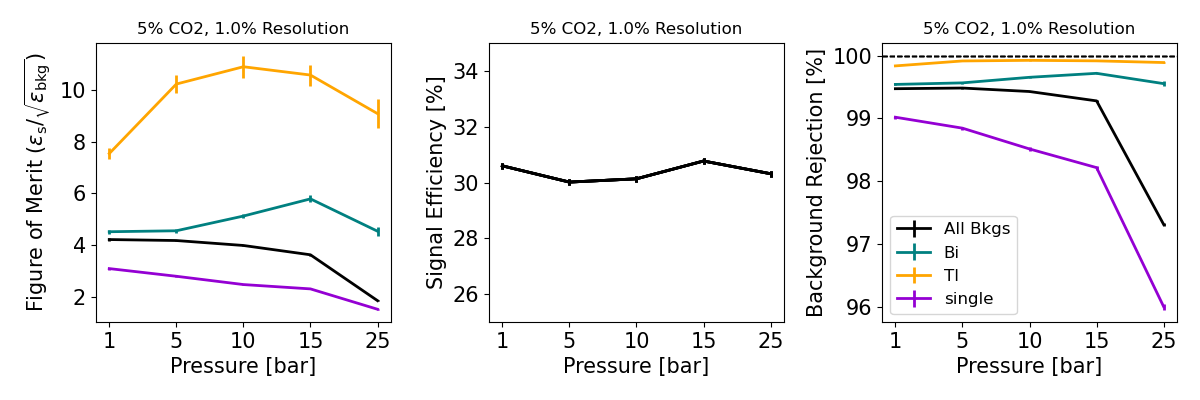

In [37]:
nubb_meta   = [nubb_meta_1bar,    nubb_meta_5bar,    nubb_meta_10bar,    nubb_meta_15bar,   nubb_meta_25bar]
Bkg_meta    = [Bkg_meta_1bar,     Bkg_meta_5bar,     Bkg_meta_10bar,     Bkg_meta_15bar,    Bkg_meta_25bar]
Bi_meta     = [Bi_meta_1bar,      Bi_meta_5bar,      Bi_meta_10bar,      Bi_meta_15bar,     Bi_meta_25bar]
Tl_meta     = [Tl_meta_1bar,      Tl_meta_5bar,      Tl_meta_10bar,      Tl_meta_15bar,     Tl_meta_25bar]
single_meta = [single_meta_1bar,  single_meta_5bar,  single_meta_10bar,  single_meta_15bar, single_meta_25bar]

num_nubb    = [num_nubb_1bar,   num_nubb_5bar,   num_nubb_10bar,   num_nubb_15bar,   num_nubb_25bar]
num_Bkg     = [num_Bkg_1bar,    num_Bkg_5bar,    num_Bkg_10bar,    num_Bkg_15bar,    num_Bkg_25bar]
num_Bi      = np.array([num_Bi_1bar,     num_Bi_5bar,     num_Bi_10bar,     num_Bi_15bar,     num_Bi_25bar])
num_Tl      = np.array([num_Tl_1bar,     num_Tl_5bar,     num_Tl_10bar,     num_Tl_15bar,     num_Tl_25bar])
num_single  = np.array([num_single_1bar, num_single_5bar, num_single_10bar, num_single_15bar, num_single_25bar])

cols = ["k", "Teal", "Orange", "darkviolet", "Pink"]
pressures_label = ["1", "5", "10", "15", "25"]
pressures = [1, 5, 10, 15, 25]

def Calc_FOM_err(fom, eff, eff_err, bkg, bkg_err):
    return fom*np.sqrt( (eff_err/eff)**2 + 0.25*(bkg_err/bkg)**2)

# mode = "enr"
mode = "nat"

if mode == "enr":
    mass = 1
    selection = "all"
    mode_label = "enriched"
else:
    mass = 10
    selection = "nat"
    mode_label = "natural"


def PlotPerformance(nubb_meta, num_nubb, Bkg_meta, num_Bkg, E_res, diff, col_index, labels):

    fom = []
    fom_err = []
    eff = []
    eff_err = []
    Bkg_eff = []
    Bkg_err = []

    # Loop over pressures
    for index in range(len(nubb_meta)):
        print("On Pressure", pressures_label[index])
        nubb_cut = ApplyCutsnoPlot(nubb_meta[index], pressures[index], diff, selection, E_res)
        Bkg_cut  = ApplyCutsnoPlot(Bkg_meta[index],  pressures[index], diff, selection, E_res)
        
        nubb_eff, nubb_err =  CalcEfficiency(nubb_cut, num_nubb[index], "nubb", pressures[index], mass)
        eff.append(100*nubb_eff)
        eff_err.append(100*nubb_err)
        
        Bkg_eff_, Bkg_err_ =  CalcEfficiency(Bkg_cut, num_Bkg[index], "Bkg", pressures[index], mass)
        Bkg_eff.append(100-100*Bkg_eff_)
        Bkg_err.append(100*Bkg_err_)

        fom.append(FOM(nubb_eff,  Bkg_eff_))
        fom_err.append(Calc_FOM_err(fom[index], nubb_eff, nubb_err, Bkg_eff_, Bkg_err_))

    axs[0].errorbar(pressures_label, fom, fom_err, color=cols[col_index], linewidth = 2, label =f"{labels[col_index]}")
    axs[0].set_xlabel("Pressure [bar]")
    axs[0].set_ylabel(r"Figure of Merit ($\epsilon_{\mathrm{s}}/\sqrt{\epsilon_{\mathrm{bkg}}}$)")

    axs[1].errorbar(pressures_label, eff, eff_err, color="k", linewidth = 2, label =f"{labels[col_index]}")
    axs[1].set_xlabel("Pressure [bar]")
    axs[1].set_ylabel("Signal Efficiency [%]")
    axs[1].set_ylim(25,35)

    axs[2].errorbar(pressures_label, Bkg_eff, Bkg_err, color=cols[col_index], linewidth = 2, label =f"{labels[col_index]}")
    axs[2].set_xlabel("Pressure [bar]")
    axs[2].set_ylabel("Background Rejection [%]")


    # axs[0].legend(fontsize=12)
    # axs[1].legend(fontsize=12)
    axs[2].legend(fontsize=12)
    axs[2].axhline(y=100, color='k', linestyle='--', linewidth=1)

    if (diff == "nodiff"):
        axs[0].set_title(f"No Diffusion {E_res}% Resolution", fontsize=12)
        axs[1].set_title(f"No Diffusion {E_res}% Resolution", fontsize=12)
        axs[2].set_title(f"No Diffusion {E_res}% Resolution", fontsize=12)
    else:
        axs[0].set_title(f"5% CO2, {E_res}% Resolution", fontsize=12)
        axs[1].set_title(f"5% CO2, {E_res}% Resolution", fontsize=12)
        axs[2].set_title(f"5% CO2, {E_res}% Resolution", fontsize=12)

    plt.tight_layout()

    return eff, 1 - np.array(Bkg_eff)/100, fom

labels=["All Bkgs", "Bi", "Tl", "single"]

for E_res in [1.0]:

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    eff, bkg_perf_all, fom_all       = np.array(PlotPerformance(nubb_meta, num_nubb, Bkg_meta, num_Bkg, E_res, diff, 0, labels))
    eff, bkg_perf_Bi, fom_Bi         = np.array(PlotPerformance(nubb_meta, num_nubb, Bi_meta, num_Bi, E_res, diff, 1, labels))
    eff, bkg_perf_Tl, fom_Tl         = np.array(PlotPerformance(nubb_meta, num_nubb, Tl_meta, num_Tl, E_res, diff, 2, labels))
    eff, bkg_perf_single, fom_single = np.array(PlotPerformance(nubb_meta, num_nubb, single_meta, num_single, E_res, diff, 3, labels))


    # Print a latex table
    print(r"\begin{table}[h!]")
    print(r"\centering")
    print(r"\resizebox{\columnwidth}{!}{%")
    print(r"\begin{tabular}{|c|c||T|T||O|O||V|V||c|c|}")
    print(r"\hline")
    print(r"\textbf{Pressure [bar]} & \textbf{Sig. Eff} & \textbf{Bkg. Eff Bi} & \textbf{F.O.M. Bi} & \textbf{Bkg. Eff Tl} & \textbf{F.O.M. Tl} & \textbf{Bkg. Eff Single} & \textbf{F.O.M. Single} & \textbf{Bkg. Eff Tot} & \textbf{F.O.M. Tot} \\")
    print(r"\hline")
    for p, e, Bi, fBi, Tl, fTl, Sin, fSin, b, f in zip(pressures_label, eff, bkg_perf_Bi, fom_Bi, bkg_perf_Tl, fom_Tl, bkg_perf_single, fom_single, bkg_perf_all, fom_all):
        print(f"{p} & {e/100.:.3f} & {Bi:.5f} & {fBi:.1f} & {Tl:.5f} & {fTl:.1f} & {Sin:.5f} & {fSin:.1f} & {b:.5f} & {f:.1f} \\\\")
    print(r"\hline")
    print(r"\end{tabular}")
    print(r"}")
    print(f"\\caption{{Performance table for an energy resolution cut of {E_res}\%, {diff}, and {mode_label} xenon detector.}}")
    print(f"\\label{{tab:performance_{mode}_{E_res}_{diff}}}")
    print(r"\end{table}")


    if (E_res == 1.0):
        plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Performance_1percent_pressure_{mode}_{diff}.pdf")
        bkg_perf_all_1    = bkg_perf_all
        bkg_perf_Bi_1     = bkg_perf_Bi
        bkg_perf_Tl_1     = bkg_perf_Tl
        bkg_perf_single_1 = bkg_perf_single
    else:
        plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Performance_0.5percent_pressure_{mode}_{diff}.pdf")

In [7]:
print(100* (1-bkg_perf_Bi))
print(1/bkg_perf_all)
print(1/bkg_perf_Bi)
print(1/bkg_perf_Tl)
print(1/bkg_perf_single)

[99.24697134 99.41322484 99.57893184 99.6774813  99.51062085]
[116.61095219 147.87840933 145.60757971 121.69708573  32.85311659]
[132.79707113 170.42302956 237.49124088 310.05954466 204.34054054]
[ 371.31939163  911.08812261 1099.2962963  1040.39690722  790.96052632]
[63.04601227 67.12058924 56.34947491 49.21009896 22.08489087]


In [39]:


if mode == "enr":
    # This defined the number of generated events in the original sample
    Bi_gen = np.array([29970000000, 6297900000, 3000000000, 1160960000, 1051920000])
    Tl_gen = np.array([2067930000,  510000000,  259998000,  210000000,  150000000])
    single_gen = np.array([2455900, 1734000, 1545000, 1472509, 1335000])


    # Define the number of events in original sample to the number of events in the reco file
    Bi_window_gen = np.array([203864, 310716, 359864, 229621, 390171])
    Tl_window_gen = np.array([195314, 237794, 207822, 221240, 212943])
    single_window_gen = np.array([185034, 195925, 193298, 193937, 184586])
else:
    # This defined the number of generated events in the original sample
    Bi_gen = np.array([100000000, 100000000, 100000000, 100000000, 100000000])
    Tl_gen = np.array([10000000,  10000000,  10000000,  10000000,  10000000])
    single_gen = np.array([2455900, 1734000, 1545000, 1472509, 1335000])


    # Define the number of events in original sample to the number of events in the reco file
    Bi_window_gen = np.array([2875, 19738, 41342, 60386, 95248])
    Tl_window_gen = np.array([3105, 10698, 15350, 17547, 20589])
    single_containment_corr = np.array([69.0/53.2, 82.8/74.0, 87.2/80.6, 89.8/83.5, 92.0/87.6 ])
    single_window_gen = np.array([185034, 195925, 193298, 193937, 184586])*single_containment_corr

print(Bi_window_gen[4]/Bi_gen[4])

# This defines the reconstruction efficiency
Reco_eff_Bi = num_Bi/Bi_window_gen
Reco_eff_Tl = num_Tl/Tl_window_gen
Reco_eff_single = num_single/single_window_gen

single_gen = single_gen/0.093 # scale due to Xe-137 spectrum
Bi_window_gen = Bi_window_gen*1.2# 1.2 corrects for the 4cm -> 12cm copper rates
Tl_window_gen = Tl_window_gen*1.2


0.00095248


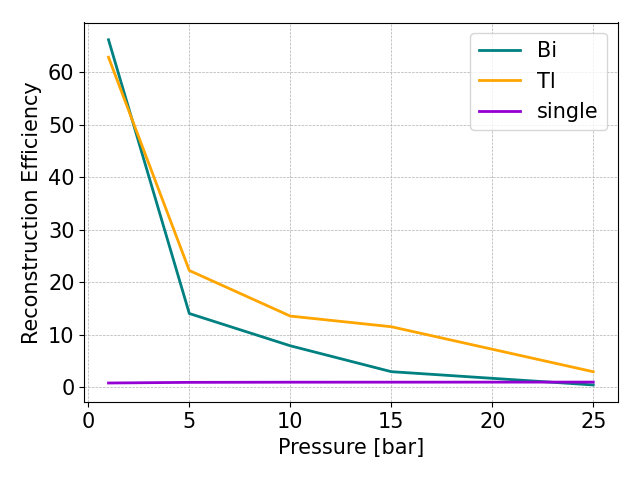

In [40]:
fig, ax1 = plt.subplots()
ax1.plot(pressures, Reco_eff_Bi, color = "Teal", linewidth = 2, label = "Bi")
ax1.plot(pressures, Reco_eff_Tl, color = "Orange", linewidth = 2, label = "Tl")
ax1.plot(pressures, Reco_eff_single, color = "darkviolet", linewidth = 2, label = "single")
ax1.set_xlabel("Pressure [bar]")
ax1.set_ylabel("Reconstruction Efficiency")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.tick_params(which='minor', length=4, color='gray')
# ax1.set_title(diff)
ax1.legend()
fig.tight_layout()
plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/RecoEff_{mode}_{diff}.pdf")

Mode is natural!

Bi
Pressure:  1  Acceptance: 1.5852198434078268e-07 Activity [muBq] 0.06115863728619027 Rate 0.19288919529720847
Pressure:  5  Acceptance: 1.0303779858147637e-06 Activity [muBq] 0.13653124132358951 Rate 0.43060778867824584
Pressure:  10  Acceptance: 1.718416685363684e-06 Activity [muBq] 0.14381811090709465 Rate 0.4536193121175196
Pressure:  15  Acceptance: 2.0505672714127908e-06 Activity [muBq] 0.1264580263239419 Rate 0.42174183720206876
Pressure:  25  Acceptance: 5.109725259900103e-06 Activity [muBq] 0.23333917456848713 Rate 0.7354640692313974
[0.19288919529720847, 0.43060778867824584, 0.4536193121175196, 0.42174183720206876, 0.7354640692313974]

Tl
Pressure:  1  Acceptance: 6.142785463407853e-07 Activity [muBq] 0.08118234305914364 Rate 0.2560422782434364
Pressure:  5  Acceptance: 1.106717579081036e-06 Activity [muBq] 0.050234283193055854 Rate 0.15843460728765205
Pressure:  10  Acceptance: 1.4096463827269772e-06 Activity [muBq] 0.040413197567457766 Rate 0.12746799944

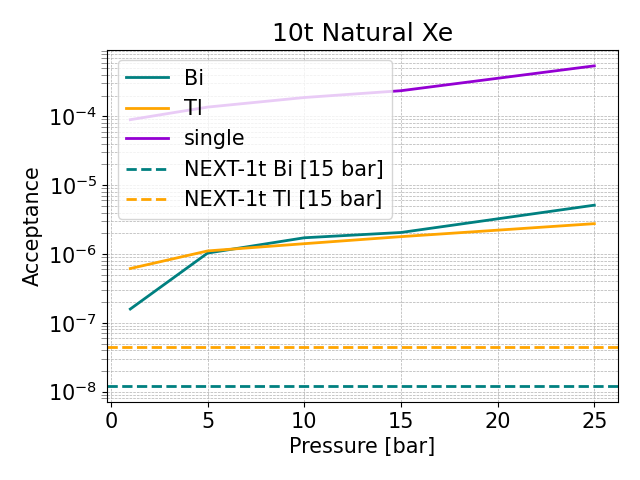

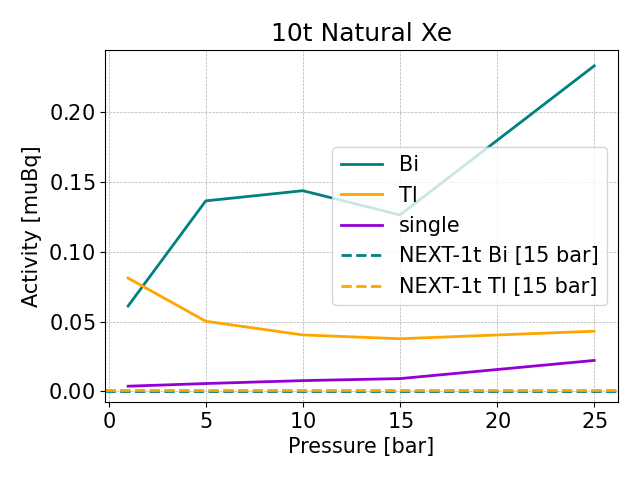

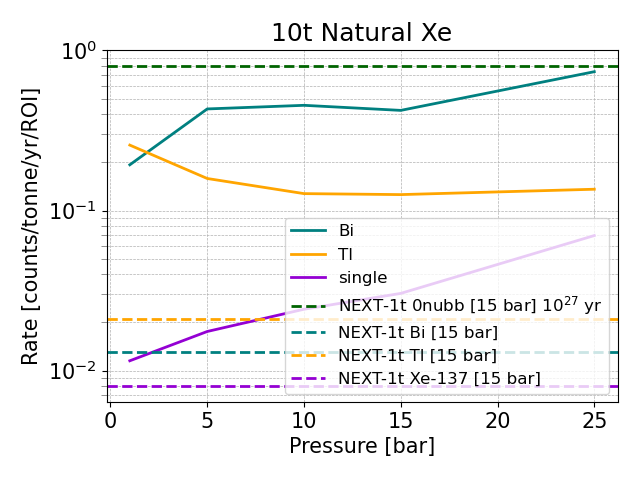

In [41]:
# Make a plot of the expected rate accounting for natural radioactivity
plt.rcParams.update({'font.size': 15})

def CalcMassCylinder(det_size, thick):
    rho_Cu   = 8960 # kg/m^3x
    return np.pi*0.25*rho_Cu * ( (det_size+2*thick)**3 - det_size**3 )


def CalcAcceptance(p, det_size, Ngen, Nwin, Reco_eff, Rej, BR, A_bkg, mode, enrichment, mass):
    # A_bkg = Activity of background muBq/kg e.g. of Cu or Xe-137
    rho_Xe = 5.987 # kg/m3
    M_Xe = mass * enrichment * rho_Xe * p * np.pi*0.25*det_size**3/1e3 # tonne
    MCu = CalcMassCylinder(det_size, 4e-2)

    # print("Detsize", det_size)
    # print("MXe", M_Xe)
    # print("MCu", MCu/1000)
    # print("Rej", Rej)
    # print("Reco_eff", Reco_eff)
    # print("Nwin", Nwin)
    # print("Ngen", Ngen/1e9)
    # print("Nwin/Ngen", (Rej * Nwin) / (Ngen/BR * Reco_eff))
    # print( (Rej * Nwin) / (Ngen/BR * Reco_eff),  (Rej * Nwin) / ( (Reco_eff*Ngen)) )

    Acceptance = Rej * Nwin / Ngen 
    # Acceptance = Nwin / Ngen 

    if (mode == "single"):
        Activity = Acceptance * A_bkg * M_Xe * BR # muBq
    else:
        Activity = Acceptance * A_bkg * MCu * BR # muBq
    
    Rate = 1e-6*Activity * 24*3600*365/M_Xe

    print("Pressure: ",p, " Acceptance:", Acceptance, "Activity [muBq]", Activity, "Rate", Rate)


    return Acceptance, Activity, Rate


if mode == "enr":
    print("Mode is enriched!")
    mass = 1
    enrichment = 0.9
    title = "1t Enriched Xe"
    detsizes = np.array([6.182, 3.615, 2.870, 2.507, 2.114])
else:
    print("Mode is natural!")
    mass = 10
    enrichment = 0.09
    title = "10t Natural Xe"
    detsizes = np.array([13.319, 7.789, 6.182, 5.301, 4.556])


print("\nBi")
Acceptance_1bar_Bi,  Activity_1bar_Bi,  Rate_1bar_Bi  = CalcAcceptance(1,  detsizes[0], Bi_gen[0], Bi_window_gen[0], Reco_eff_Bi[0], bkg_perf_Bi[0], 1.0, 1.28, "Bi", enrichment, mass)
Acceptance_5bar_Bi,  Activity_5bar_Bi,  Rate_5bar_Bi  = CalcAcceptance(5,  detsizes[1], Bi_gen[1], Bi_window_gen[1], Reco_eff_Bi[1], bkg_perf_Bi[1], 1.0, 1.28, "Bi", enrichment, mass)
Acceptance_10bar_Bi, Activity_10bar_Bi, Rate_10bar_Bi = CalcAcceptance(10, detsizes[2], Bi_gen[2], Bi_window_gen[2], Reco_eff_Bi[2], bkg_perf_Bi[2], 1.0, 1.28, "Bi", enrichment, mass)
Acceptance_15bar_Bi, Activity_15bar_Bi, Rate_15bar_Bi = CalcAcceptance(15, detsizes[3], Bi_gen[3], Bi_window_gen[3], Reco_eff_Bi[3], bkg_perf_Bi[3], 1.0, 1.28, "Bi", enrichment, mass)
Acceptance_25bar_Bi, Activity_25bar_Bi, Rate_25bar_Bi = CalcAcceptance(25, detsizes[4], Bi_gen[4], Bi_window_gen[4], Reco_eff_Bi[4], bkg_perf_Bi[4], 1.0, 1.28, "Bi", enrichment, mass)

Acceptance_Bi = [Acceptance_1bar_Bi, Acceptance_5bar_Bi, Acceptance_10bar_Bi, Acceptance_15bar_Bi, Acceptance_25bar_Bi]
Activity_Bi = [Activity_1bar_Bi, Activity_5bar_Bi, Activity_10bar_Bi, Activity_15bar_Bi, Activity_25bar_Bi]
Rate_Bi = [Rate_1bar_Bi, Rate_5bar_Bi, Rate_10bar_Bi, Rate_15bar_Bi, Rate_25bar_Bi]
print(Rate_Bi)

print("\nTl")
Acceptance_1bar_Tl,  Activity_1bar_Tl,  Rate_1bar_Tl  = CalcAcceptance(1,  detsizes[0], Tl_gen[0], Tl_window_gen[0], Reco_eff_Tl[0], bkg_perf_Tl[0], 35.94e-2, 1.22, "Tl", enrichment, mass) # the 35% is the Br of Th->Tl as activities are for Th 
Acceptance_5bar_Tl,  Activity_5bar_Tl,  Rate_5bar_Tl  = CalcAcceptance(5,  detsizes[1], Tl_gen[1], Tl_window_gen[1], Reco_eff_Tl[1], bkg_perf_Tl[1], 35.94e-2, 1.22, "Tl", enrichment, mass)
Acceptance_10bar_Tl, Activity_10bar_Tl, Rate_10bar_Tl = CalcAcceptance(10, detsizes[2], Tl_gen[2], Tl_window_gen[2], Reco_eff_Tl[2], bkg_perf_Tl[2], 35.94e-2, 1.22, "Tl", enrichment, mass)
Acceptance_15bar_Tl, Activity_15bar_Tl, Rate_15bar_Tl = CalcAcceptance(15, detsizes[3], Tl_gen[3], Tl_window_gen[3], Reco_eff_Tl[3], bkg_perf_Tl[3], 35.94e-2, 1.22, "Tl", enrichment, mass)
Acceptance_25bar_Tl, Activity_25bar_Tl, Rate_25bar_Tl = CalcAcceptance(25, detsizes[4], Tl_gen[4], Tl_window_gen[4], Reco_eff_Tl[4], bkg_perf_Tl[4], 35.94e-2, 1.22, "Tl", enrichment, mass)

Acceptance_Tl = [Acceptance_1bar_Tl, Acceptance_5bar_Tl, Acceptance_10bar_Tl, Acceptance_15bar_Tl, Acceptance_25bar_Tl]
Activity_Tl = [Activity_1bar_Tl, Activity_5bar_Tl, Activity_10bar_Tl, Activity_15bar_Tl, Activity_25bar_Tl]
Rate_Tl = [Rate_1bar_Tl, Rate_5bar_Tl, Rate_10bar_Tl, Rate_15bar_Tl, Rate_25bar_Tl]
print(Rate_Tl)

print("\nXe-137")
Acceptance_1bar_single,  Activity_1bar_single,  Rate_1bar_single  = CalcAcceptance(1,  detsizes[0], single_gen[0], single_window_gen[0], Reco_eff_single[0], bkg_perf_single[0], 1.0, 4.1, "single", enrichment, mass) # the 35% is the Br of Th->Tl as activities are for Th 
Acceptance_5bar_single,  Activity_5bar_single,  Rate_5bar_single  = CalcAcceptance(5,  detsizes[1], single_gen[1], single_window_gen[1], Reco_eff_single[1], bkg_perf_single[1], 1.0, 4.1, "single", enrichment, mass)
Acceptance_10bar_single, Activity_10bar_single, Rate_10bar_single = CalcAcceptance(10, detsizes[2], single_gen[2], single_window_gen[2], Reco_eff_single[2], bkg_perf_single[2], 1.0, 4.1, "single", enrichment, mass)
Acceptance_15bar_single, Activity_15bar_single, Rate_15bar_single = CalcAcceptance(15, detsizes[3], single_gen[3], single_window_gen[3], Reco_eff_single[3], bkg_perf_single[3], 1.0, 4.1, "single", enrichment, mass)
Acceptance_25bar_single, Activity_25bar_single, Rate_25bar_single = CalcAcceptance(25, detsizes[4], single_gen[4], single_window_gen[4], Reco_eff_single[4], bkg_perf_single[4], 1.0, 4.1, "single", enrichment, mass)

Acceptance_single = [Acceptance_1bar_single, Acceptance_5bar_single, Acceptance_10bar_single, Acceptance_15bar_single, Acceptance_25bar_single]
Activity_single = [Activity_1bar_single, Activity_5bar_single, Activity_10bar_single, Activity_15bar_single, Activity_25bar_single]
Rate_single = [Rate_1bar_single, Rate_5bar_single, Rate_10bar_single, Rate_15bar_single, Rate_25bar_single]



fig, ax1 = plt.subplots()
ax1.plot(pressures, Acceptance_Bi, color = "Teal", linewidth = 2, label = "Bi")
ax1.plot(pressures, Acceptance_Tl, color = "Orange", linewidth = 2, label = "Tl")
ax1.plot(pressures, Acceptance_single, color = "darkviolet", linewidth = 2, label = "single")
ax1.set_xlabel("Pressure [bar]")
ax1.set_ylabel("Acceptance")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.tick_params(which='minor', length=4, color='gray')
ax1.axhline(y=1.2e-8, color='Teal', linestyle='--', linewidth=2, label = "NEXT-1t Bi [15 bar]")
ax1.axhline(y=4.5e-8, color='Orange', linestyle='--', linewidth=2, label = "NEXT-1t Tl [15 bar]")
ax1.set_title(title)
ax1.legend()
ax1.semilogy()
fig.tight_layout()
plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Acceptance_{mode}.pdf")


fig, ax2 = plt.subplots()
ax2.plot(pressures, Activity_Bi, color = "Teal", linewidth = 2, label = "Bi")
ax2.plot(pressures, Activity_Tl, color = "Orange", linewidth = 2, label = "Tl")
ax2.plot(pressures, Activity_single, color = "darkviolet", linewidth = 2, label = "single")
ax2.set_xlabel("Pressure [bar]")
ax2.set_ylabel("Activity [muBq]")
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.tick_params(which='minor', length=4, color='gray')
ax2.axhline(y=4.5e-4, color='Teal', linestyle='--', linewidth=2, label = "NEXT-1t Bi [15 bar]")
ax2.axhline(y=7.5e-4, color='Orange', linestyle='--', linewidth=2, label = "NEXT-1t Tl [15 bar]")
ax2.set_title(title)
ax2.legend()

# Use scientific notation ("standard form") on both axes
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3, 4))  # switch to sci notation outside this range

ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

fig.tight_layout()
plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Activity_{mode}.pdf")

fig, ax3 = plt.subplots()
# ax2 = ax1.twinx()
ax3.plot(pressures, Rate_Bi, color = "Teal", linewidth = 2, label = "Bi")
ax3.plot(pressures, Rate_Tl, color = "Orange", linewidth = 2, label = "Tl")
ax3.plot(pressures, Rate_single, color = "darkviolet", linewidth = 2, label = "single")
ax3.axhline(y=8e-1, color='darkgreen', linestyle='--', linewidth=2, label = "NEXT-1t 0nubb [15 bar] $10^{27}$ yr")
ax3.axhline(y=1.3e-2, color='Teal', linestyle='--', linewidth=2, label = "NEXT-1t Bi [15 bar]")
ax3.axhline(y=2.1e-2, color='Orange', linestyle='--', linewidth=2, label = "NEXT-1t Tl [15 bar]")
ax3.axhline(y=8e-3, color='darkviolet', linestyle='--', linewidth=2, label = "NEXT-1t Xe-137 [15 bar]")
ax3.set_ylabel("Rate [counts/tonne/yr/ROI]")
ax3.set_xlabel("Pressure [bar]")
ax3.semilogy()
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.tick_params(which='minor', length=4, color='gray')
ax3.set_title(title)
ax3.legend(fontsize=12)
# ax3.set_ylim(1e-3, 1)

fig.tight_layout()

plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Rate_{mode}.pdf")

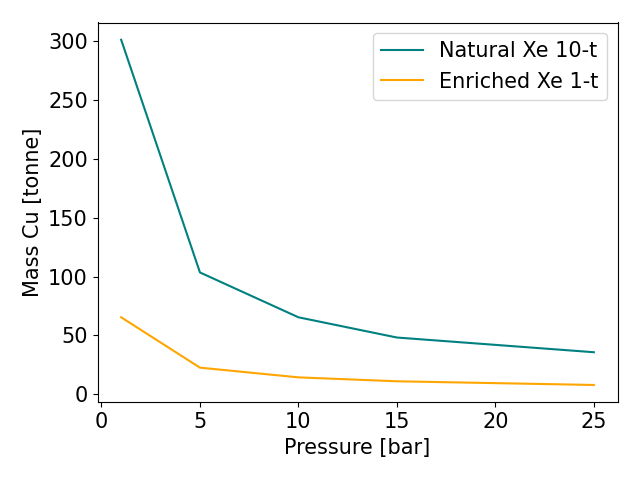

In [36]:
# Plot the number of events interacting in the window vs mass Cu

def CalcMass(det_size):
    rho_Cu   = 8960 # kg/m^3x``
    return rho_Cu * ( (det_size+8e-2)**3 - det_size**3 )

def CalcMassCylinder(det_size, thick):
    rho_Cu   = 8960 # kg/m^3x
    return np.pi*0.25*rho_Cu * ( (det_size+2*thick)**3 - det_size**3 )


MCu = np.array([6.182, 3.615, 2.870, 2.507, 2.114])
MCu = CalcMassCylinder(MCu, 4e-2)

MCu_nat = np.array([13.319, 7.789, 6.182, 5.301, 4.556])
MCu_nat = CalcMassCylinder(MCu_nat, 4e-2)


plt.figure()
plt.plot(pressures, MCu_nat/1e3, label = "Natural Xe 10-t", color="Teal")
plt.plot(pressures, MCu/1e3, label = "Enriched Xe 1-t", color="Orange")
# plt.semilogy()
plt.xlabel("Pressure [bar]")
# plt.ylabel("Num Int Evts * MCu [gammas * kg]")
plt.ylabel("Mass Cu [tonne]")
plt.legend()
plt.tight_layout()

plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Mass_Copper.pdf")